# DCEP, Digital Corpus of the European Parliament
> Documents published on the European Parliament's official website

- toc: false
- badges: false
- comments: false
- author: Morgan McGuire
- categories: [DCEP, translation, nmt, mt]

### Available for Download  ✅
⚠️ Always check the license of the data source before using the data ⚠️
- Main page: [https://ec.europa.eu/jrc/en/language-technologies/dcep](https://ec.europa.eu/jrc/en/language-technologies/dcep)
- Download Link: [https://wt-public.emm4u.eu/Resources/DCEP-2013/DCEP-Download-Page.html](https://wt-public.emm4u.eu/Resources/DCEP-2013/DCEP-Download-Page.html)
- Extraction Instructions: [https://wt-public.emm4u.eu/Resources/DCEP-2013/DCEP-extract-README.html](https://wt-public.emm4u.eu/Resources/DCEP-2013/DCEP-extract-README.html)
- Format: **Sentence-aligned data is in plain text**

### Brief Description

Contains the majority of the documents published on the European Parliament's official website. It comprises a variety of document types, from press releases to session and legislative documents related to European Parliament's activities and bodies. The current version of the corpus contains documents that were produced between 2001 and 2012.

### Other Notes

- Lines of text: 46,146
- GA Word count: 1,029,348

### Word Count Distribution

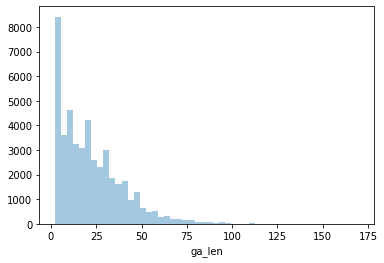

In [14]:
#hide_input
import seaborn as sns
sns.distplot(ga_df.ga_len, kde=False)
plt.title('ga word count distribution');

### Code to Extract Files to Pandas DataFrame
GA-EN specific instructions are below, for more info see the offical [extraction instructions page](https://wt-public.emm4u.eu/Resources/DCEP-2013/DCEP-extract-README.html)

1. Download and extract language files

In [ ]:
!wget -q http://optima.jrc.it/Resources/DCEP-2013/sentences/DCEP-sentence-GA-pub.tar.bz2

In [ ]:
!wget -q http://optima.jrc.it/Resources/DCEP-2013/sentences/DCEP-sentence-EN-pub.tar.bz2

In [ ]:
!tar jxf DCEP-sentence-GA-pub.tar.bz2

In [ ]:
!tar jxf DCEP-sentence-EN-pub.tar.bz2

2. Download and extract language pair info

In [13]:
!wget -q http://optima.jrc.it/Resources/DCEP-2013/langpairs/DCEP-EN-GA.tar.bz2

In [10]:
!tar jxf DCEP-EN-GA.tar.bz2

3. Download and extract alignment scripts

In [12]:
!wget -q http://optima.jrc.it/Resources/DCEP-2013/DCEP-extract-scripts.tar.bz2

In [ ]:
!tar jxvf DCEP-extract-scripts.tar.bz2

4. Create aligned file

> The `--numbering-filter` is a crude but useful heuristic that attempts to drop numberings
and short titles from the output. It works simply by matching sentences on both sides
against a Unicode regex that looks for two alphabetic characters with space between them.

> The `--length-filter-level=LENGTH_FILTER_LEVEL` argument is used to throw away as suspicious
all bisentences where the ratio of the shorter and the longer sentence (in character length)
is less than LENGTH_FILTER_LEVEL percent.

In [15]:
!cd dcep && ./src/languagepair.py --numbering-filter --length-filter-level=40 EN-GA > EN-GA-bisentences.txt

5. Open as a Dataframe

In [18]:
import pandas as pd

df = pd.read_csv('dcep/EN-GA-bisentences.txt', header=None, sep='\t')
df.columns = ['en', 'ga']
df.to_csv('dcep_en-ga_bisentences.csv')
print(len(df))
df.head()

46147


,en,ga
0,RULES OF PROCEDURE,RIALACHA NÓS IMEACHTA
1,7th parliamentary term,7ú téarma parlaiminteach
2,July 2009,Iúil 2009
3,Interpretations of the Rules (pursuant to Rule...,Tá léirmhínithe ar na Rialacha (de bhun Riail ...
4,"MEMBERS, PARLIAMENT BODIES AND POLITICAL GROUPS","FEISIRÍ, COMHLACHTAÍ PARLAIMINTE AGUS GRÚPAÍ P..."
